In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Meals

In [6]:
meals = pd.read_csv('./raw_data/meals.csv')
meals['Meal Categories'].fillna('', inplace=True)
meals['Cuisine Type'].fillna('', inplace=True)

### Generate columns from unqiue meal categories

In [7]:
def split_and_add_to_set(column_values, unique_structure, split_character):
    for val in column_values.split(split_character):
        unique_structure.add(val)

def clean_value(val):
    return val.replace('/', '_').replace(' ', '_').lower()

In [8]:
unique_meal_categories = set()

meals['Meal Categories'].apply(split_and_add_to_set, args=(unique_meal_categories, ',', ))

for category in unique_meal_categories:
    if len(category) > 0:
        column_name = 'is_category_' + clean_value(category)
        meals[column_name] = meals['Meal Categories'].apply(lambda x: 1 if category in x.split(',') else 0)

### Generate columns from unique cuisine types

In [9]:
unique_cuisine_types = set()

meals['Cuisine Type'].apply(split_and_add_to_set, args=(unique_cuisine_types, ';', ))

for cuisine_type in unique_cuisine_types:
    if len(cuisine_type) > 0:
        column_name = 'is_cuisine_type_' + clean_value(cuisine_type)
        meals[column_name] = meals['Cuisine Type'].apply(lambda x: 1 if cuisine_type in x.split(',') else 0)

In [11]:
list(meals.columns)

['Id',
 'Cook Id',
 'Venue Id',
 'Menu Id',
 'Is Cancelled',
 'Is Active',
 'Title',
 'Meal Date',
 'Day of Date Added',
 'Is Public?',
 'Number Of Seats',
 'Venue Style',
 'Venue Capacity',
 'Area Id',
 'Menu Style',
 'Cuisine Type',
 'Meal Categories',
 'is_category_kosher',
 'is_category_paleo',
 'is_category_organic',
 'is_category_vegetarian',
 'is_category_vegan',
 'is_category_gluten_free',
 'is_category_raw',
 'is_category_halal',
 'is_category_local',
 'is_cuisine_type_portuguese',
 'is_cuisine_type_irish',
 'is_cuisine_type_cajun_creole',
 'is_cuisine_type_polynesian',
 'is_cuisine_type_chinese',
 'is_cuisine_type_peruvian',
 'is_cuisine_type_chamorro',
 'is_cuisine_type_belgian',
 'is_cuisine_type_central_american',
 'is_cuisine_type_mediterranean',
 'is_cuisine_type_japanese',
 'is_cuisine_type_mexican',
 'is_cuisine_type_singaporean',
 'is_cuisine_type_ecuadorian',
 'is_cuisine_type_persian',
 'is_cuisine_type_lao',
 'is_cuisine_type_asian',
 'is_cuisine_type_latin_america

#### write to csv

In [165]:
meals.to_csv('./cleaned/meals.csv', header=False, index=False)

# Cooks

In [15]:
cooks = pd.read_csv('./raw_data/cooks.csv')
cooks['Cooking Experience'].fillna('', inplace=True)
cooks['Cooking Experience Years'].fillna('', inplace=True)
cooks['Reasons For Cooking'].fillna('', inplace=True)
cooks['Referrer'].fillna('', inplace=True)
cooks['Date of Application'].fillna('', inplace=True)
cooks['Cuisine Types'].fillna('', inplace=True)
cooks['Cooking Experience Years'] = cooks['Cooking Experience Years'].apply(lambda x: x.replace(' years', '').strip())

### Add columns for each unique value for cuisine types

In [16]:
unique_cooks_cuisine_types = set()

cooks['Cuisine Types'].apply(split_and_add_to_set, args=(unique_cooks_cuisine_types, ';',))

for cuisine_type in unique_cooks_cuisine_types:
    if len(cuisine_type) > 0:
        column_name = 'is_cooks_cuisine_type_' + clean_value(cuisine_type)
        cooks[column_name] = cooks['Cuisine Types'].apply(lambda x: 1 if cuisine_type in x.split(';') else 0)

### Add columns for each unique value for reasons

In [17]:
unique_reasons = set()

cooks['Reasons For Cooking'].apply(split_and_add_to_set, args=(unique_reasons, ',',))

for reason in unique_reasons:
    if len(reason) > 0:
        column_name = 'is_reason_' + clean_value(reason)
        cooks[column_name] = cooks['Reasons For Cooking'].apply(lambda x: 1 if reason in x.split(',') else 0)

In [23]:
# list(cooks.columns)
# cooks.Referrer.value_counts()
# columns to dummify: 'Cooking Experience', 'Cooking Experience Years', 'Referrer'


,Id,Cuisine Types,Day of Date Joined,Cooking Experience,Cooking Experience Years,Date of Application,Reasons For Cooking,Referrer,is_cooks_cuisine_type_portuguese,is_cooks_cuisine_type_cajun_creole,...,is_cooks_cuisine_type_east_european,is_cooks_cuisine_type_nordic,is_cooks_cuisine_type_north_american,is_cooks_cuisine_type_californian,is_cooks_cuisine_type_seafood,is_cooks_cuisine_type_soul_food,is_cooks_cuisine_type_italian,is_reason_meet,is_reason_brand,is_reason_money
0,107233,,2017-10-10,,,,,,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106894,indian,2017-10-06,,,,,,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106852,californian;caribbean;colombian,2017-10-06,Caterer or Personal Chef,4-7,2017-10-06,"meet,brand,money",friend,0,0,...,0,0,0,1,0,0,0,1,1,1
3,106506,asian;californian;other,2017-10-03,,,,,,0,0,...,0,0,0,1,0,0,0,0,0,0
4,105463,brunch;californian;soul food,2017-09-24,,8+,2017-09-24,"brand,meet,money",social,0,0,...,0,0,0,1,0,1,0,1,1,1
5,105433,,2017-09-24,,,,,,0,0,...,0,0,0,0,0,0,0,0,0,0
6,105235,barbecue;californian;italian,2017-09-22,,,,,,0,0,...,0,0,0,1,0,0,1,0,0,0
7,105214,barbecue;cajun/creole;californian,2017-09-22,Caterer or Personal Chef,8+,2017-09-22,"brand,money,meet",friend,0,1,...,0,0,0,1,0,0,0,1,1,1
8,105202,filipino;french;tapas/small plates,2017-09-22,,,,,,0,0,...,0,0,0,0,0,0,0,0,0,0
9,105133,north american;russian;seafood,2017-09-21,,,,,,0,0,...,0,0,1,0,1,0,0,0,0,0


#### write to csv

In [169]:
cooks.to_csv('./cleaned/cooks.csv', header=False, index=False)

# Reviews

In [4]:
reviews = pd.read_csv('./raw_data/reviews.csv')
reviews['Meal Recommend'].fillna('', inplace=True)
reviews['Cook Review'].fillna('', inplace=True)
reviews['Feastly Review'].fillna('', inplace=True)
reviews['Private Review'].fillna('', inplace=True)
reviews['Hear About'].fillna('', inplace=True)

#### write to csv

In [171]:
reviews.to_csv('./cleaned/reviews.csv', header=False, index=False)

# Purchases

In [5]:
purchases = pd.read_csv('./raw_data/purchases.csv')
purchases['Number of Add Ons'].fillna(0.0, inplace=True)
purchases['Add On Amount'].fillna(0.0, inplace=True)

#### write to csv

In [173]:
purchases.to_csv('./cleaned/purchases.csv', header=False, index=False)

# Venues

In [24]:
venues = pd.read_csv('./raw_data/venues.csv')
venues['Name'].fillna('', inplace=True)
venues['Max Seats'].fillna('', inplace=True)
venues['Monthly Services'].fillna('', inplace=True)
venues['Address'].fillna('', inplace=True)
venues['Neighborhood'].fillna('', inplace=True)
venues['Zipcode'].fillna('', inplace=True)

In [26]:
list(venues.columns)

['Id',
 'Name',
 'Venue Style',
 'Location Id',
 'Area Id',
 'Max Seats',
 'Monthly Services',
 'Owner Id',
 'Address',
 'Day of Date Added',
 'Neighborhood',
 'Zipcode']

#### write to csv

In [175]:
venues.to_csv('./cleaned/venues.csv', header=False, index=False)

# Menus

In [12]:
menus = pd.read_csv('./raw_data/menus.csv')
menus['About'].fillna('', inplace=True)
menus['Cuisine Type'].fillna('', inplace=True)

### Generate column indicators for distinct cuisine types

In [13]:
unique_menus_cuisine_types = set()

menus['Cuisine Type'].apply(split_and_add_to_set, args=(unique_menus_cuisine_types, ';',))

for cuisine_type in unique_menus_cuisine_types:
    if len(cuisine_type) > 0:
        column_name = 'is_menus_cuisine_type_' + clean_value(cuisine_type)
        menus[column_name] = menus['Cuisine Type'].apply(lambda x: 1 if cuisine_type in x.split(';') else 0)

#### write to csv

In [178]:
menus.to_csv('./cleaned/menus.csv', header=False, index=False)

In [221]:
purchases['Zipcode'].apply(lambda x: len(x)).max()

12

In [222]:
list(purchases.columns)

['Id',
 'Meal Id',
 'Purchaser Id',
 'Full Amount',
 'Total Discounted Amount',
 'Total Amount',
 'Number Of Seats',
 'Credits Amount',
 'Day of Date Added',
 'Number of Add Ons',
 'Add On Amount']

In [210]:
purchases['Hear About'].value_counts()

        50574
2.0      6935
4.0      3006
8.0      2525
16.0      724
32.0      647
Name: Hear About, dtype: int64

In [60]:
df = pd.read_csv('./meal_seats.csv', delimiter='|', names=['meal_id', 'meal_created_date', 'meal_date', 'ticket_price',  'seats_available', 'seats_sold',  'percentage_seats_sold'])
df['meal_year'] = pd.to_datetime(df.meal_date).apply(lambda x: x.year)
df = df[(df.ticket_price < 90) & (df.ticket_price > 20) & (df.meal_year == 2016)]

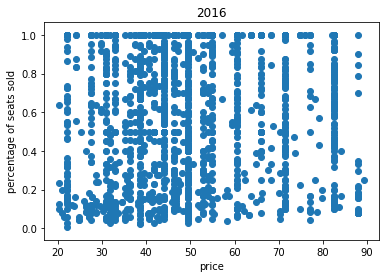

In [61]:
plt.scatter(df['ticket_price'], df['percentage_seats_sold'])
plt.xlabel('price')
plt.ylabel('percentage of seats sold')
plt.title('2016')
plt.show()

In [99]:
tickets = pd.read_csv('./feastly/tickets.csv', delimiter='|')

In [127]:
meal_price_outliers = list(tickets[(tickets.ticket_price < 5) | (tickets.ticket_price > 200)].meal_id)

def is_meal_with_crazy_ticket_price(row):
    if row['meal_id'] in meal_price_outliers:
        return False
    else:
        return True

tickets = tickets[tickets.apply(is_meal_with_crazy_ticket_price, axis=1)]

In [128]:
tickets.describe().T

,count,mean,std,min,25%,50%,75%,max
meal_id,91450.0,6459.261695,2798.355372,240.0,4359.0,6777.0,8812.0,11191.0
meal_seat_id,91450.0,16.293986,16.976841,1.0,6.0,12.0,21.0,200.0
number_of_seats,91450.0,31.587972,24.807997,2.0,20.0,26.0,36.0,200.0
ticket_price,91450.0,50.721926,21.565474,5.5,38.5,49.5,60.5,192.5
sold,91450.0,0.787775,0.408886,0.0,1.0,1.0,1.0,1.0


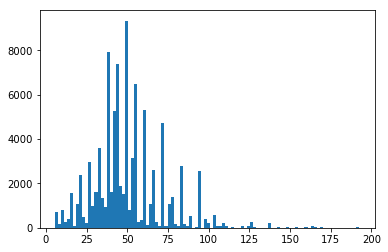

In [130]:
plt.hist(tickets.ticket_price, bins=100)
plt.show()